# INTRODUCTION

**_note_** _please check the requirements.txt file for dependencies before running any of the python code._

_use "pip install -r requirements.txt" to install dependencies._

# Problem formulation

$\min f(x) : x \in \mathbb{R}^{4,000}$
With non-trivial constraints on $x$. 

To solve this numerically, the client uses a [evolutionary strategy](https://en.wikipedia.org/wiki/CMA-ES) which searchers for an optimium while keeping to the constraints.



## CMA-ES
Visualization of how a general CMA-ES algorithm operates between iterations/generations. The process create random samples and valuates them and tries to move in the direction of the optimum.

<div>
    <img src="misc/Concept_of_directional_optimization_in_CMA-ES_algorithm.png" width="600"/>
</div>

## Iteration
In each iteration of the evolutionary strategy, the a algorthim generates 1,024 points in the 4k hyperspace.

In [1]:
from code.utils.import_data import importData # importing data
import matplotlib.pyplot as plt
import code.utils.nicer_plots
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# load data
data, labels = importData("data2.csv", "labels2.csv", "\data\\", n_features=-1,print_log=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102400 entries, 0 to 102399
Columns: 3851 entries, 0 to 3850
dtypes: float64(3851)
memory usage: 2.9 GB


In [4]:
pca = PCA(n_components=2)
pca.fit(data[labels['iteration']==24].values) # pick one iteration

finalDf = pd.concat([pd.DataFrame(data = pca.transform(data[labels['iteration']==24].values),
                     columns = ['principal-component-1', 'principal-component-2']).reset_index(),
                     labels[labels['iteration']==24].reset_index()],axis=1).drop(["index"],axis=1)

finalDf[finalDf.columns[3]] = finalDf[finalDf.columns[3]].apply(str) 

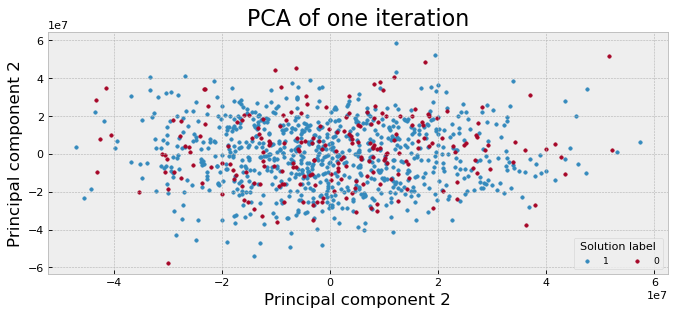

In [5]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)
ax.grid(True)

for label in ['1','0']:
    ax.scatter(finalDf[finalDf['binary-label']==label]['principal-component-1'],
               finalDf[finalDf['binary-label']==label]['principal-component-2'],
               s=10, label=label)
ax.set_xlabel(r'Principal component 2', fontsize=15)
ax.set_ylabel(r'Principal component 2', fontsize=15)
ax.set_title('PCA of one iteration',fontsize=20)
ax.legend(title='Solution label',loc='lower right', bbox_to_anchor=(1, 0),ncol=3)
plt.show()

### Evolution of Iterations
The algorithm moves in the 4k-dimensional space to look for an optimal solution.

In [6]:
pca = PCA(n_components=3)
pca.fit(data[labels['binary-label']==0].values)
principalComponents = pca.transform(data.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal-component-1', 'principal-component-2','principal-component-3'])
finalDf = pd.concat([principalDf, labels[['iteration']]], axis = 1)

finalDf = finalDf.loc[[True if x%100==0 else False for x in range(0,100*1024)]]


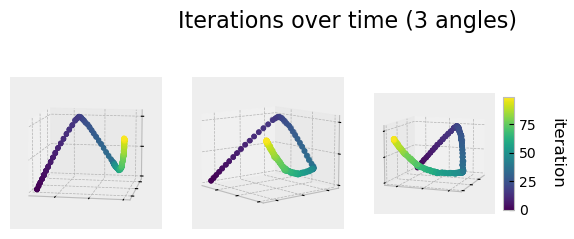

In [7]:
fig = plt.figure(figsize=(9,3),dpi=100)

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
ax2 = fig.add_subplot(1, 4, 2, projection='3d')
ax3 = fig.add_subplot(1, 4, 3, projection='3d')
import numpy as np

ax1.scatter(finalDf['principal-component-1'],
               finalDf['principal-component-2'],
               finalDf['principal-component-3'],
               s=10, label=label, c=np.array(finalDf['iteration'].values))
ax2.scatter(finalDf['principal-component-1'],
               finalDf['principal-component-2'],
               finalDf['principal-component-3'],
               s=10, label=label, c=np.array(finalDf['iteration'].values))
colors = ax3.scatter(finalDf['principal-component-1'],
               finalDf['principal-component-2'],
               finalDf['principal-component-3'],
               s=10, label=label, c=np.array(finalDf['iteration'].values))

ax1.view_init(elev=10,azim=100)
ax2.view_init(elev=10.,azim=140)
ax3.view_init(elev=10.,azim=200)
for ax in [ax1,ax2,ax3]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

cb = fig.colorbar(colors,shrink=0.5, aspect=10)
ax3.zaxis.set_rotate_label(True)
fig.suptitle("Iterations over time (3 angles)",fontsize=16)
cb.set_label('iteration', labelpad=20,rotation=270)
plt.show()

We see that the CMA-ES algorithm moves around in the space looking for an optimum

# (im)Balanced data set
The data set contains about 20% feasible (label=0) and 80% infeasible (label=1)

In [8]:
plt.style.use('ggplot')

Percentage feasible 17.02 %


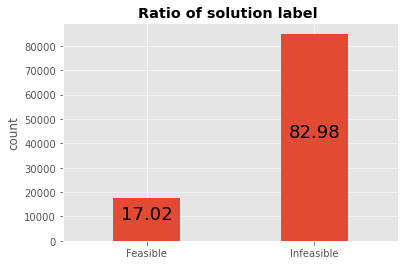

In [9]:
feasible = labels[labels['binary-label']==0]['binary-label'].count()
infeasible= labels[labels['binary-label']==1]['binary-label'].count()

print("Percentage feasible", round(feasible/(infeasible+feasible)*100,2),"%")
bar = plt.bar([0,1], [feasible,infeasible], width=0.4)

plt.text(0,feasible*0.5,str(round(feasible/(infeasible+feasible)*100,2)),ha='center',fontsize=18)

plt.text(1,infeasible*0.5,str(round(infeasible/(infeasible+feasible)*100,2)),ha='center',fontsize=18)

plt.xlim(-.5,1.5)
plt.ylabel('count')
plt.title('Ratio of solution label ', fontweight='bold', horizontalalignment='center')
plt.xticks([0,1], ('Feasible', 'Infeasible')) 
plt.show()

# Project aim
Due to the computer intensive work of determining which solutions, $x$, are feasible and which are infeasible for the optimization problem, this project aims to find a efficient machine learning algorithm which does the job.

RQ: **Can we predict solution label on future iterations by training on previous iterations?**



# Methods

In the 'code' folder you can read a python notebook of each ML model tested.
